In [175]:
import os
import glob
import base64
import pandas as pd
import torch

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [145]:
# DIRECTIORES

BASE_DIR = os.getcwd()
TRAIN_DIR = f"{BASE_DIR}/train"
TEST_DIR = f"{BASE_DIR}/test"

DIR_TYPES = {
    "train": TRAIN_DIR,
    "test": TEST_DIR
}

# PATH GETTERS

get_path = lambda items_ids: "/".join(list(map(lambda id: f"{id}" ,items_ids)))
get_file_path = lambda file_type, file_id, suffix = "": f"{DIR_TYPES[file_type]}/{get_path(file_id)}{suffix}"
get_image_path = lambda image_id, file_type = 'train': get_file_path(file_type, [image_id[0],image_id[1],image_id[2], image_id], ".png")

In [146]:
# IMAGE PREVIEW

pd.set_option('display.max_colwidth', None)

def get_thumbnail(path):
    image = Image.open(path)
    image.thumbnail((200, 200), Image.LANCZOS)
    return image

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [128]:
train_df = pd.read_csv(f"{BASE_DIR}/train_labels.csv")

In [129]:
train_df.columns

Index(['image_id', 'InChI'], dtype='object')

In [130]:
train.describe()

,image_id,InChI
count,2424186,2424186
unique,2424186,2424186
top,000011a64c74,"InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3"
freq,1,1


In [147]:
train_df.head(10)

,image_id,InChI
0,000011a64c74,"InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3"
1,000019cc0cd2,"InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(10-14)11-17(23)19-15-4-5-18(24)21(15,3)9-7-16(19)20/h13-16,19H,4-11H2,1-3H3/t13-,14+,15+,16-,19-,20+,21+/m1/s1"
2,0000252b6d2b,"InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-12-10-20(28)30)27-11-9-16-21(23(25)31)26-29(22(16)24(27)32)18-5-3-4-6-19(18)33-2/h3-8,13H,9-12H2,1-2H3,(H2,25,31)"
3,000026b49b7e,"InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-24-14)11-15(21)19-17(16(22)23)8-4-2-3-5-9-17/h6-7,10,13H,2-5,8-9,11H2,1H3,(H,18,20)(H,19,21)(H,22,23)"
4,000026fc6c36,"InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7-8)5-2-3-9(11)16/h8H,2-7H2,1H3,(H2,11,16)(H,12,14)"
5,000028818203,"InChI=1S/C19H22Br2N2O2/c1-13(2)10-16(19(24)25)23(9-8-14-6-4-3-5-7-14)15-11-17(20)22-18(21)12-15/h3-7,11-13,16H,8-10H2,1-2H3,(H,24,25)"
6,000029a61c01,"InChI=1S/C17H10BrN3O/c18-14-7-3-1-5-11(14)9-12(10-19)16-20-15-8-4-2-6-13(15)17(22)21-16/h1-9,13H/b12-9+"
7,000035624718,"InChI=1S/C21H21N5O2S/c1-15-7-8-18(17-5-4-11-22-20(15)17)29(27,28)25-13-9-16(10-14-25)21-24-23-19-6-2-3-12-26(19)21/h2-8,11-12,16H,9-10,13-14H2,1H3"
8,00003e900ef4,"InChI=1S/C13H18N2O5S/c1-4-10(13(17)18)15-12(16)9-5-7(2)8(3)11(6-9)21(14,19)20/h5-6,10H,4H2,1-3H3,(H,15,16)(H,17,18)(H2,14,19,20)"
9,000045d5fbf9,"InChI=1S/C13H15BrN2O3/c1-7-5-15-6-9(7)12(17)16-11-3-2-8(13(18)19)4-10(11)14/h2-4,7,9,15H,5-6H2,1H3,(H,16,17)(H,18,19)/t7-,9-/m1/s1"


In [148]:
train_df.dtypes

image_id    object
InChI       object
dtype: object

In [149]:
train_df.loc[0]

image_id                                                                         000011a64c74
InChI       InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3
Name: 0, dtype: object

/tmp/ipykernel_93/4094639364.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((200, 200), Image.LANCZOS)


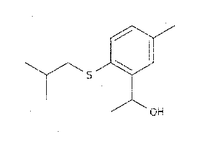

In [182]:
get_thumbnail(get_image_path(train_df.loc[0].image_id))

In [168]:
# UTILS

get_InChI_by_image_id = lambda df,image_id: df.loc[df['image_id'] == image_id, 'InChI']

get_InChI_by_image_id(train_df, '000011a64c74')

0    InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3
Name: InChI, dtype: object

In [ ]:
for i in range(len(train_df["image_id"])):
    train_df['file'] = get_image_path(train_df.loc[0].image_id)

In [ ]:
train_df.head(10)